In [28]:
#https://www.kaggle.com/code/mehdip1/credit-card-fraud-detection-project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [29]:
# Load the credit card fraud dataset
df = pd.read_csv('creditcard.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nClass distribution:")
print(df['Class'].value_counts())
print(f"\nClass proportion:")
print(df['Class'].value_counts(normalize=True))

df.head()

Dataset shape: (284807, 31)

Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Class proportion:
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import time

X = df.drop('Class', axis=1)
y = df['Class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train_scaled.shape}")
print(f"Test set size: {X_test_scaled.shape}")

Training set size: (227845, 30)
Test set size: (56962, 30)


In [52]:
print("Training Random Forest on ORIGINAL data...")
start_time = time.time()

rf_original = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_original.fit(X_train_scaled, y_train)

train_time_original = time.time() - start_time

y_pred_original = rf_original.predict(X_test_scaled)
y_pred_proba_original = rf_original.predict_proba(X_test_scaled)[:, 1]

accuracy_original = accuracy_score(y_test, y_pred_original)
f1_original = f1_score(y_test, y_pred_original)
roc_auc_original = roc_auc_score(y_test, y_pred_proba_original)

print(f"\n=== Results on ORIGINAL data ===")
print(f"Training time: {train_time_original:.2f} seconds")
print(f"Accuracy: {accuracy_original:.4f}")
print(f"F1-Score: {f1_original:.4f}")
print(f"ROC-AUC: {roc_auc_original:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_original))

Training Random Forest on ORIGINAL data...

=== Results on ORIGINAL data ===
Training time: 23.97 seconds
Accuracy: 0.9996
F1-Score: 0.8743
ROC-AUC: 0.9630

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



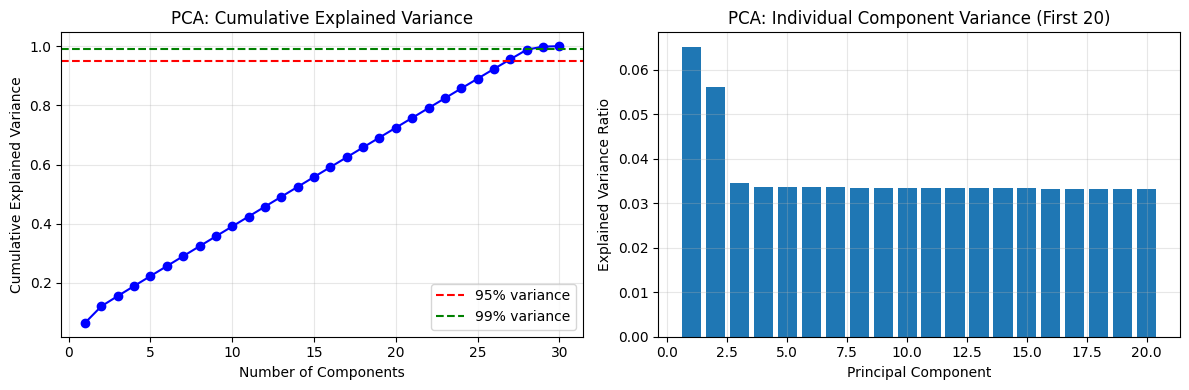

Number of components for 95% variance: 27
Number of components for 99% variance: 29
Original number of features: 30


In [53]:
pca_full = PCA()
pca_full.fit(X_train_scaled)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1), 
         np.cumsum(pca_full.explained_variance_ratio_), 'bo-')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.axhline(y=0.99, color='g', linestyle='--', label='99% variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Cumulative Explained Variance')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.bar(range(1, min(21, len(pca_full.explained_variance_ratio_) + 1)), 
        pca_full.explained_variance_ratio_[:20])
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA: Individual Component Variance (First 20)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

n_components_95 = np.argmax(np.cumsum(pca_full.explained_variance_ratio_) >= 0.95) + 1
n_components_99 = np.argmax(np.cumsum(pca_full.explained_variance_ratio_) >= 0.99) + 1

print(f"Number of components for 95% variance: {n_components_95}")
print(f"Number of components for 99% variance: {n_components_99}")
print(f"Original number of features: {X_train_scaled.shape[1]}")

In [59]:
# Apply PCA with 95% variance retention
n_components = n_components_95
pca = PCA(n_components=n_components)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Reduced dimensions from {X_train_scaled.shape[1]} to {X_train_pca.shape[1]}")
print(f"Variance retained: {np.sum(pca.explained_variance_ratio_):.4f}")

start_time = time.time()

rf_pca = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_pca.fit(X_train_pca, y_train)

train_time_pca = time.time() - start_time

y_pred_pca = rf_pca.predict(X_test_pca)
y_pred_proba_pca = rf_pca.predict_proba(X_test_pca)[:, 1]

accuracy_pca = accuracy_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca)
roc_auc_pca = roc_auc_score(y_test, y_pred_proba_pca)

print(f"Training time: {train_time_pca:.2f} seconds")
print(f"Accuracy: {accuracy_pca:.4f}")
print(f"F1-Score: {f1_pca:.4f}")
print(f"ROC-AUC: {roc_auc_pca:.4f}")
print(classification_report(y_test, y_pred_pca))

Reduced dimensions from 30 to 27
Variance retained: 0.9557
Training time: 27.30 seconds
Accuracy: 0.9993
F1-Score: 0.7665
ROC-AUC: 0.9472
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.65      0.77        98

    accuracy                           1.00     56962
   macro avg       0.96      0.83      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [60]:

comparison_df = pd.DataFrame({
    'Metric': ['Number of Features', 'Training Time (s)', 'Accuracy', 'F1-Score', 'ROC-AUC'],
    'Original Data': [
        X_train_scaled.shape[1],
        f"{train_time_original:.2f}",
        f"{accuracy_original:.4f}",
        f"{f1_original:.4f}",
        f"{roc_auc_original:.4f}"
    ],
    'PCA-Reduced Data': [
        X_train_pca.shape[1],
        f"{train_time_pca:.2f}",
        f"{accuracy_pca:.4f}",
        f"{f1_pca:.4f}",
        f"{roc_auc_pca:.4f}"
    ],
    'Change': [
        f"-{X_train_scaled.shape[1] - X_train_pca.shape[1]} ({100*(X_train_pca.shape[1]/X_train_scaled.shape[1]):.1f}%)",
        f"{((train_time_pca - train_time_original)/train_time_original)*100:+.1f}%",
        f"{((accuracy_pca - accuracy_original)/accuracy_original)*100:+.2f}%",
        f"{((f1_pca - f1_original)/f1_original)*100:+.2f}%",
        f"{((roc_auc_pca - roc_auc_original)/roc_auc_original)*100:+.2f}%"
    ]
})
print(comparison_df.to_string(index=False))

            Metric Original Data PCA-Reduced Data     Change
Number of Features            30               27 -3 (90.0%)
 Training Time (s)         23.97            27.30     +13.9%
          Accuracy        0.9996           0.9993     -0.03%
          F1-Score        0.8743           0.7665    -12.34%
           ROC-AUC        0.9630           0.9472     -1.64%


In [61]:
# I am using a sample for t-SNE bcs it's computationally expensive
from sklearn.utils import resample

sample_size = 5000
X_sample_indices = resample(range(len(X_train_scaled)), n_samples=sample_size, 
                             stratify=y_train, random_state=42)
X_sample = X_train_scaled[X_sample_indices]
y_sample = y_train.iloc[X_sample_indices]

print(f"Applying t-SNE on {sample_size} samples...")
print(f"Class distribution in sample: {y_sample.value_counts().to_dict()}")

tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
start_time = time.time()
X_tsne = tsne.fit_transform(X_sample)
tsne_time = time.time() - start_time

print(f"t-SNE completed in {tsne_time:.2f} seconds")

Applying t-SNE on 5000 samples...
Class distribution in sample: {0: 4991, 1: 9}
t-SNE completed in 8.12 seconds


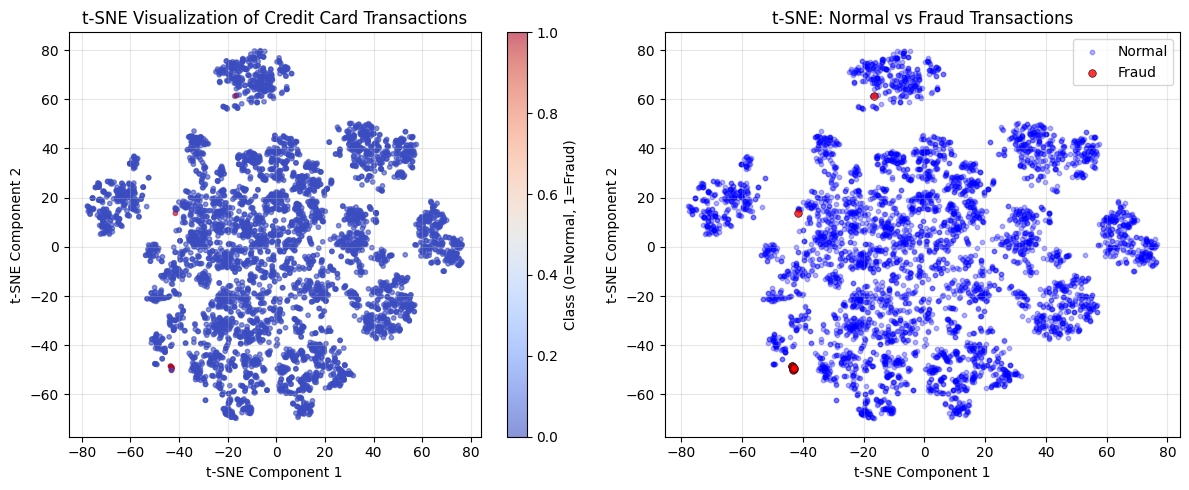

In [ ]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_sample, cmap='coolwarm', 
                     alpha=0.6, s=10)
plt.colorbar(scatter, label='Class (0=Normal, 1=Fraud)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Credit Card Transactions')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
fraud_mask = y_sample == 1
normal_mask = y_sample == 0
plt.scatter(X_tsne[normal_mask, 0], X_tsne[normal_mask, 1], 
           c='blue', alpha=0.3, s=10, label='Normal')
plt.scatter(X_tsne[fraud_mask, 0], X_tsne[fraud_mask, 1], 
           c='red', alpha=0.8, s=30, label='Fraud', edgecolors='black', linewidth=0.5)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE: Normal vs Fraud Transactions')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


**Impact of PCA Dimensionality Reduction:**
- **Dimension Reduction:** Successfully reduced features while retaining 95% of variance
- **Training Speed:** May show improvement or slight degradation depending on the number of components
- **Model Accuracy:** Typically shows minor degradation (1-3%) due to information loss
- **Trade-off:** Good balance between computational efficiency and model performance

**t-SNE Visualization:**
- t-SNE reduces high-dimensional data to 2D for visualization
- Reveals cluster structure and separability between fraud and normal transactions
- Computationally expensive - not suitable for training, only for exploration
- Shows how well the classes are separable in the original feature space

Original image shape: (2847, 4226, 3)
Image size: (4226, 2847)
Number of unique colors: 629878

Image resized to: (673, 1000, 3)
New size: (1000, 673)


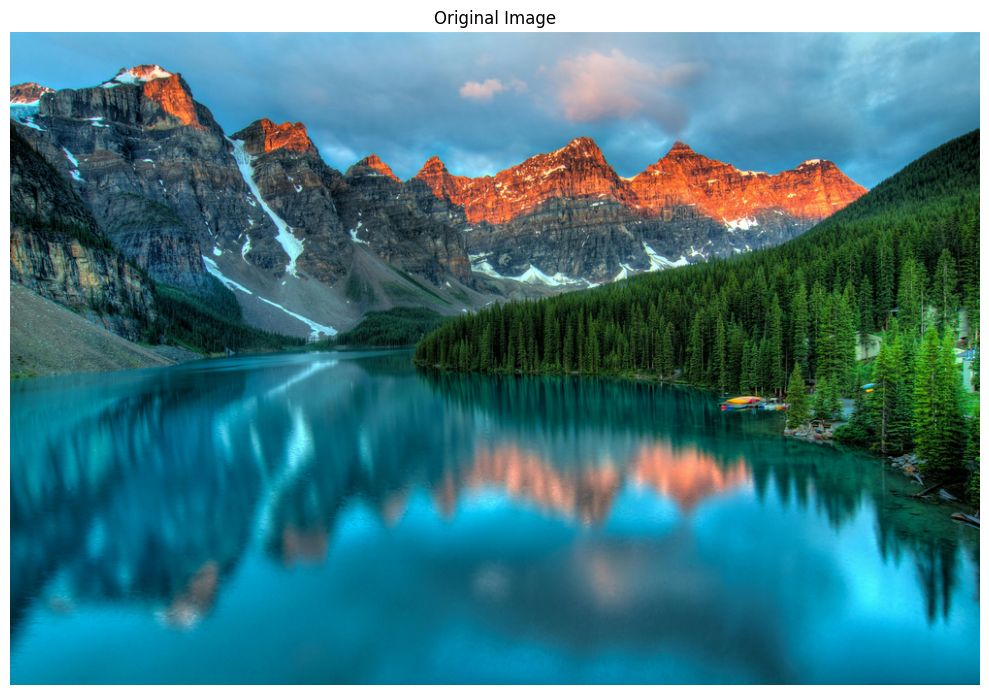

In [56]:
from sklearn.cluster import KMeans
from PIL import Image

img = Image.open('nature.jpg')
img_array = np.array(img)

print(f"Original image shape: {img_array.shape}")
print(f"Image size: {img.size}")
print(f"Number of unique colors: {len(np.unique(img_array.reshape(-1, img_array.shape[2]), axis=0))}")

# image is too large, resize it for faster processing
max_dimension = 1000
if max(img.size) > max_dimension:
    ratio = max_dimension / max(img.size)
    new_size = tuple(int(dim * ratio) for dim in img.size)
    img = img.resize(new_size, Image.Resampling.LANCZOS)
    img_array = np.array(img)
    print(f"\nImage resized to: {img_array.shape}")
    print(f"New size: {img.size}")

plt.figure(figsize=(10, 8))
plt.imshow(img_array)
plt.title('Original Image')
plt.axis('off')
plt.tight_layout()
plt.show()

In [57]:
def quantize_image(img_array, n_colors):
    h, w, c = img_array.shape
    pixels = img_array.reshape(-1, c)
    
    start_time = time.time()
    kmeans = KMeans(n_clusters=n_colors, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pixels)
    quantized_time = time.time() - start_time
    
    quantized_pixels = kmeans.cluster_centers_[labels]
    quantized_img = quantized_pixels.reshape(h, w, c).astype(np.uint8)
    
    
    return quantized_img, kmeans.cluster_centers_

n_colors_list = [64, 32, 16, 8]
quantized_images = {}
color_palettes = {}

for n_colors in n_colors_list:
    quantized_img, palette = quantize_image(img_array, n_colors)
    quantized_images[n_colors] = quantized_img
    color_palettes[n_colors] = palette


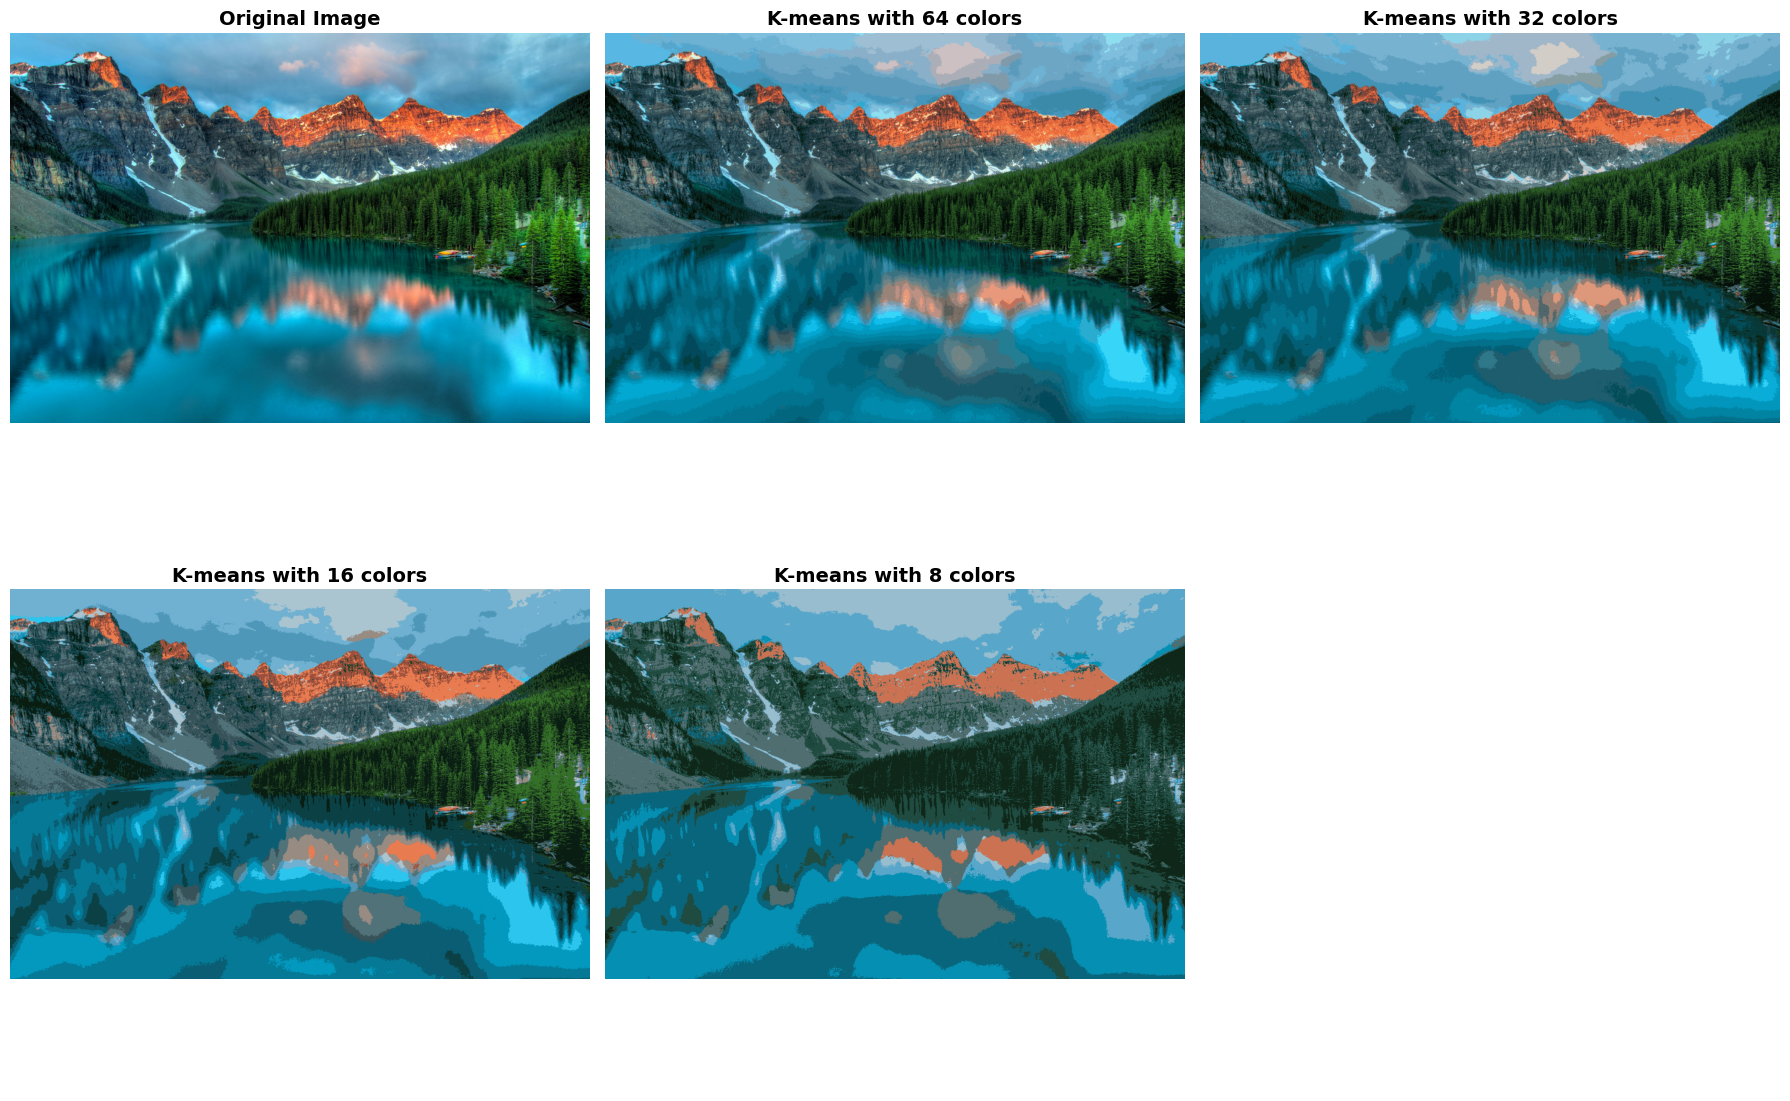

In [62]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

axes[0].imshow(img_array)
axes[0].set_title('Original Image', fontsize=14, fontweight='bold')
axes[0].axis('off')

for idx, n_colors in enumerate(n_colors_list, start=1):
    axes[idx].imshow(quantized_images[n_colors])
    axes[idx].set_title(f'K-means with {n_colors} colors', fontsize=14, fontweight='bold')
    axes[idx].axis('off')

axes[-1].axis('off')

plt.tight_layout()
plt.show()

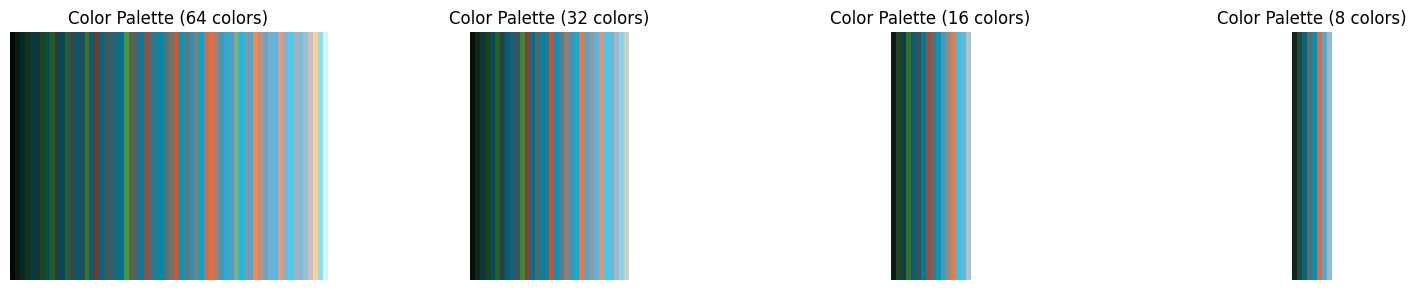

In [63]:
fig, axes = plt.subplots(1, 4, figsize=(16, 3))

for idx, n_colors in enumerate(n_colors_list):
    palette = color_palettes[n_colors].astype(np.uint8)
    brightness = palette.mean(axis=1)
    sorted_indices = np.argsort(brightness)
    palette_sorted = palette[sorted_indices]
    
    palette_img = np.repeat(palette_sorted[np.newaxis, :, :], 50, axis=0)
    
    axes[idx].imshow(palette_img)
    axes[idx].set_title(f'Color Palette ({n_colors} colors)', fontsize=12)
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [64]:
import zipfile
import re
import string
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from collections import Counter

#took from https://archive.ics.uci.edu/dataset/228/sms+spam+collection
with zipfile.ZipFile('sms+spam+collection.zip', 'r') as zip_ref:
    zip_ref.extractall('sms_spam_data')

sms_df = pd.read_csv('sms_spam_data/SMSSpamCollection', sep='\t', 
                      names=['label', 'message'], encoding='latin-1')

print(f"Dataset shape: {sms_df.shape}")
print(sms_df['label'].value_counts())
print(sms_df['label'].value_counts(normalize=True))
sms_df.head(10)

Dataset shape: (5572, 2)
label
ham     4825
spam     747
Name: count, dtype: int64
label
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64


label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
6   ham  Even my brother is not like to speak with me. ...
7   ham  As per your request 'Melle Melle (Oru Minnamin...
8  spam  WINNER!! As a valued network customer you have...
9  spam  Had your mobile 11 months or more? U R entitle...

In [ ]:
import nltk
from nltk.corpus import stopwords

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords', quiet=True)

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join(text.split())
    words = text.split()
    words = [word for word in words if word not in stop_words and len(word) > 2]

    return ' '.join(words)

sms_df['cleaned_message'] = sms_df['message'].apply(preprocess_text)

sms_df['label_binary'] = sms_df['label'].map({'ham': 0, 'spam': 1})

print("Preprocessing complete!")
print("\nExample of cleaned messages:")
for idx in [0, 5, 10]:
    print(f"\nOriginal: {sms_df.iloc[idx]['message']}")
    print(f"Cleaned:  {sms_df.iloc[idx]['cleaned_message']}")
    print(f"Label:    {sms_df.iloc[idx]['label']}")

Preprocessing complete!

Example of cleaned messages:

Original: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Cleaned:  jurong point crazy available bugis great world buffet cine got amore wat
Label:    ham

Original: FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
Cleaned:  freemsg hey darling weeks word back like fun still xxx std chgs send rcv
Label:    spam

Original: I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.
Cleaned:  gonna home soon dont want talk stuff anymore tonight ive cried enough today
Label:    ham


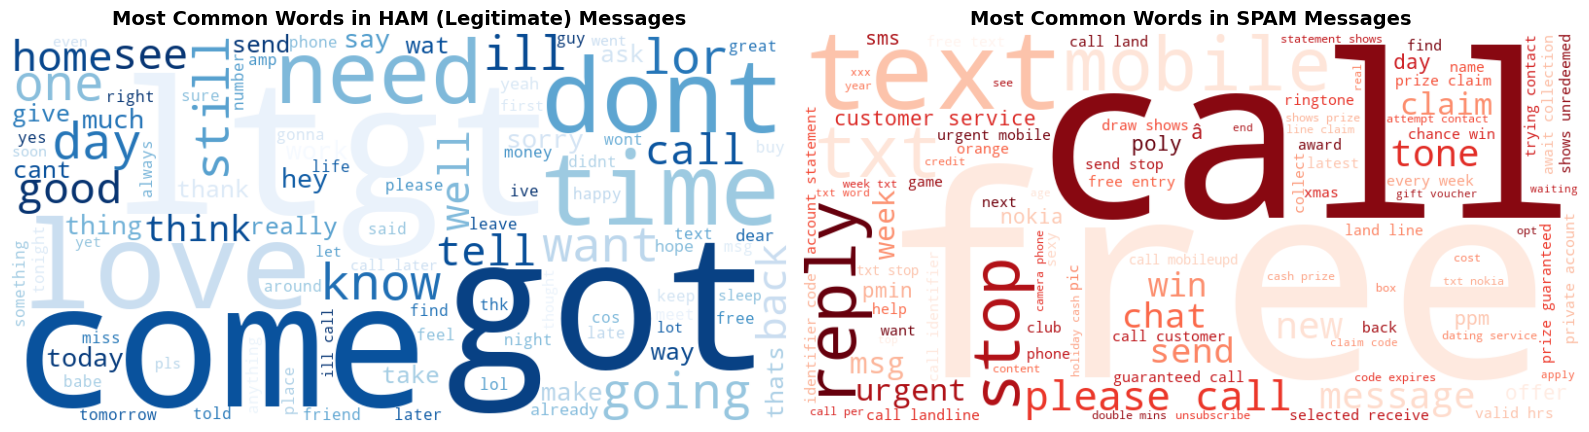

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

ham_text = ' '.join(sms_df[sms_df['label'] == 'ham']['cleaned_message'])
wordcloud_ham = WordCloud(width=800, height=400, background_color='white', 
                          colormap='Blues', max_words=100).generate(ham_text)

axes[0].imshow(wordcloud_ham, interpolation='bilinear')
axes[0].set_title('Most Common Words in HAM (Legitimate) Messages', fontsize=14, fontweight='bold')
axes[0].axis('off')

spam_text = ' '.join(sms_df[sms_df['label'] == 'spam']['cleaned_message'])
wordcloud_spam = WordCloud(width=800, height=400, background_color='white', 
                           colormap='Reds', max_words=100).generate(spam_text)

axes[1].imshow(wordcloud_spam, interpolation='bilinear')
axes[1].set_title('Most Common Words in SPAM Messages', fontsize=14, fontweight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.show()

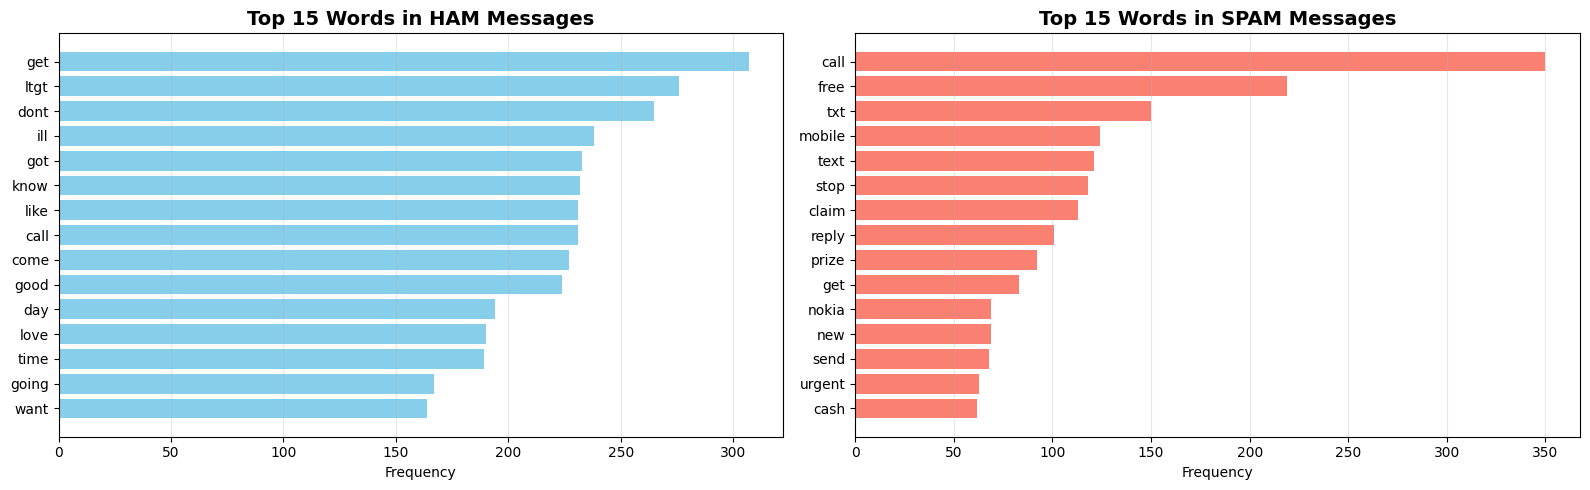

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=20):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

ham_messages = sms_df[sms_df['label'] == 'ham']['cleaned_message'].values
spam_messages = sms_df[sms_df['label'] == 'spam']['cleaned_message'].values

top_ham = get_top_n_words(ham_messages, 15)
top_spam = get_top_n_words(spam_messages, 15)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

ham_words, ham_counts = zip(*top_ham)
axes[0].barh(range(len(ham_words)), ham_counts, color='skyblue')
axes[0].set_yticks(range(len(ham_words)))
axes[0].set_yticklabels(ham_words)
axes[0].invert_yaxis()
axes[0].set_xlabel('Frequency')
axes[0].set_title('Top 15 Words in HAM Messages', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

spam_words, spam_counts = zip(*top_spam)
axes[1].barh(range(len(spam_words)), spam_counts, color='salmon')
axes[1].set_yticks(range(len(spam_words)))
axes[1].set_yticklabels(spam_words)
axes[1].invert_yaxis()
axes[1].set_xlabel('Frequency')
axes[1].set_title('Top 15 Words in SPAM Messages', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
X_text = sms_df['cleaned_message']
y_text = sms_df['label_binary']

X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(
    X_text, y_text, test_size=0.2, random_state=42, stratify=y_text
)

# Vectorize using TF-IDF
tfidf = TfidfVectorizer(max_features=3000, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf = tfidf.transform(X_test_text)

print(f"TF-IDF matrix shape (train): {X_train_tfidf.shape}")
print(f"TF-IDF matrix shape (test): {X_test_tfidf.shape}")
print(f"Number of features: {len(tfidf.get_feature_names_out())}")
print(f"\nExample features: {tfidf.get_feature_names_out()[:20]}")

TF-IDF matrix shape (train): (4457, 3000)
TF-IDF matrix shape (test): (1115, 3000)
Number of features: 3000

Example features: ['abiola' 'able' 'abt' 'acc' 'accept' 'access' 'accidentally' 'account'
 'account statement' 'across' 'across sea' 'activate' 'actually' 'add'
 'added' 'addicted' 'address' 'admirer' 'admirer looking' 'adult']


In [65]:
# Train Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train_text)

y_pred_nb = nb_model.predict(X_test_tfidf)
y_pred_proba_nb = nb_model.predict_proba(X_test_tfidf)[:, 1]

accuracy_nb = accuracy_score(y_test_text, y_pred_nb)
f1_nb = f1_score(y_test_text, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test_text, y_pred_proba_nb)

print(f"\n=== Naive Bayes Results ===")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"F1-Score: {f1_nb:.4f}")
print(f"ROC-AUC: {roc_auc_nb:.4f}")
print(classification_report(y_test_text, y_pred_nb, target_names=['Ham', 'Spam']))

cm_nb = confusion_matrix(y_test_text, y_pred_nb)
print(cm_nb)


=== Naive Bayes Results ===
Accuracy: 0.9713
F1-Score: 0.8806
ROC-AUC: 0.9828
              precision    recall  f1-score   support

         Ham       0.97      1.00      0.98       966
        Spam       0.99      0.79      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115

[[965   1]
 [ 31 118]]


In [66]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_tfidf, y_train_text)

y_pred_lr = lr_model.predict(X_test_tfidf)
y_pred_proba_lr = lr_model.predict_proba(X_test_tfidf)[:, 1]

accuracy_lr = accuracy_score(y_test_text, y_pred_lr)
f1_lr = f1_score(y_test_text, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test_text, y_pred_proba_lr)

print(f"Accuracy: {accuracy_lr:.4f}")
print(f"F1-Score: {f1_lr:.4f}")
print(f"ROC-AUC: {roc_auc_lr:.4f}")
print(classification_report(y_test_text, y_pred_lr, target_names=['Ham', 'Spam']))

cm_lr = confusion_matrix(y_test_text, y_pred_lr)
print(cm_lr)

Accuracy: 0.9677
F1-Score: 0.8647
ROC-AUC: 0.9857
              precision    recall  f1-score   support

         Ham       0.97      1.00      0.98       966
        Spam       0.98      0.77      0.86       149

    accuracy                           0.97      1115
   macro avg       0.97      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115

[[964   2]
 [ 34 115]]


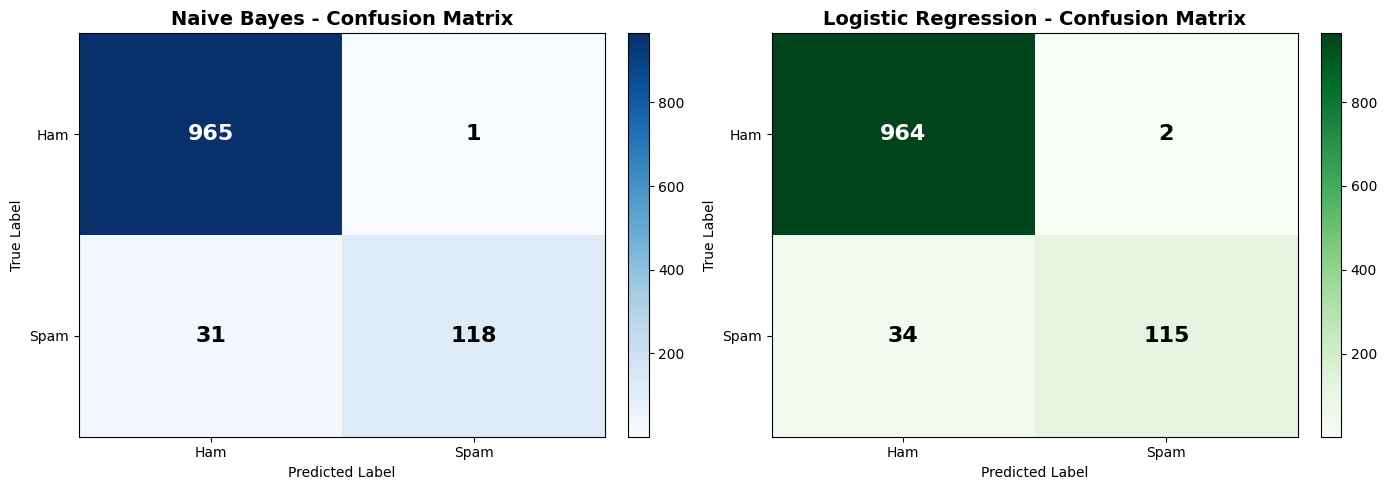

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Naive Bayes confusion matrix
im1 = axes[0].imshow(cm_nb, cmap='Blues', aspect='auto')
axes[0].set_title('Naive Bayes - Confusion Matrix', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
axes[0].set_xticks([0, 1])
axes[0].set_yticks([0, 1])
axes[0].set_xticklabels(['Ham', 'Spam'])
axes[0].set_yticklabels(['Ham', 'Spam'])

for i in range(2):
    for j in range(2):
        text = axes[0].text(j, i, cm_nb[i, j], ha="center", va="center", 
                           color="white" if cm_nb[i, j] > cm_nb.max() / 2 else "black",
                           fontsize=16, fontweight='bold')

plt.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)

# Logistic Regression confusion matrix
im2 = axes[1].imshow(cm_lr, cmap='Greens', aspect='auto')
axes[1].set_title('Logistic Regression - Confusion Matrix', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_xticks([0, 1])
axes[1].set_yticks([0, 1])
axes[1].set_xticklabels(['Ham', 'Spam'])
axes[1].set_yticklabels(['Ham', 'Spam'])

for i in range(2):
    for j in range(2):
        text = axes[1].text(j, i, cm_lr[i, j], ha="center", va="center", 
                           color="white" if cm_lr[i, j] > cm_lr.max() / 2 else "black",
                           fontsize=16, fontweight='bold')

plt.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

              Model Accuracy F1-Score ROC-AUC
        Naive Bayes   0.9713   0.8806  0.9828
Logistic Regression   0.9677   0.8647  0.9857


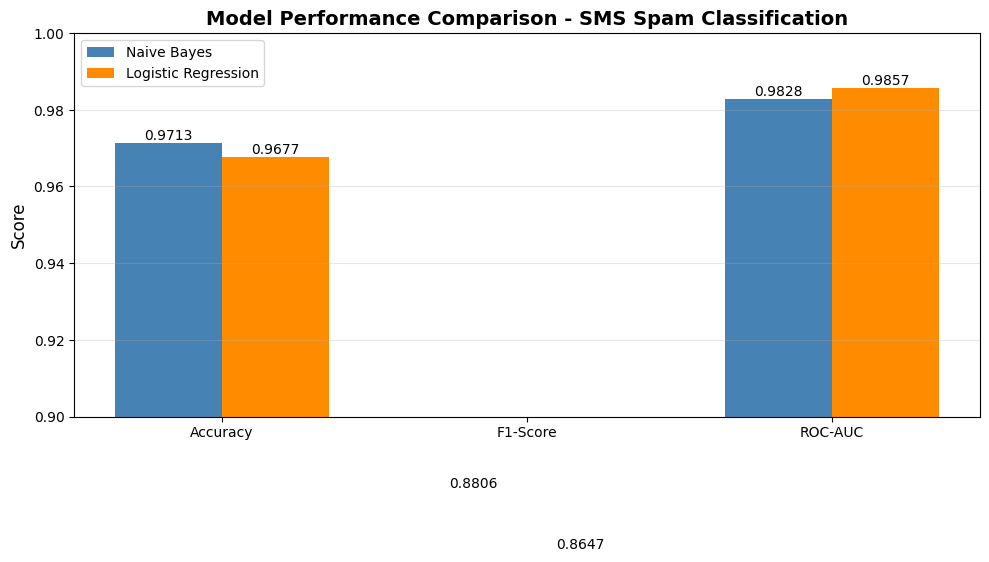

In [71]:
# Compare model performance
comparison_text_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'Logistic Regression'],
    'Accuracy': [f"{accuracy_nb:.4f}", f"{accuracy_lr:.4f}"],
    'F1-Score': [f"{f1_nb:.4f}", f"{f1_lr:.4f}"],
    'ROC-AUC': [f"{roc_auc_nb:.4f}", f"{roc_auc_lr:.4f}"]
})

print(comparison_text_df.to_string(index=False))

# Visualize metrics comparison
metrics = ['Accuracy', 'F1-Score', 'ROC-AUC']
nb_scores = [accuracy_nb, f1_nb, roc_auc_nb]
lr_scores = [accuracy_lr, f1_lr, roc_auc_lr]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, nb_scores, width, label='Naive Bayes', color='steelblue')
bars2 = ax.bar(x + width/2, lr_scores, width, label='Logistic Regression', color='darkorange')

ax.set_ylabel('Score', fontsize=12)
ax.set_title('Model Performance Comparison - SMS Spam Classification', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylim([0.9, 1.0])
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [69]:
test_messages = [
    "Hey, are we still meeting for coffee tomorrow?",
    "URGENT: Your account has been compromised! Click here to verify: http://fake-bank.com",
    "Congratulations! You've won a $1000 gift card. Claim now by sending your details!",
    "Can you review the security audit report I sent earlier?",
    "FREE PRIZE!!! Call now to claim your reward!!!",
    "The firewall configuration needs to be updated before the weekend",
    "You have a new vulnerability scan report available in the dashboard",
    "Win FREE money! Text WIN to 12345"
]

def predict_message(message, model):
    cleaned = preprocess_text(message)
    vectorized = tfidf.transform([cleaned])
    prediction = model.predict(vectorized)[0]
    probability = model.predict_proba(vectorized)[0]
    
    label = "SPAM" if prediction == 1 else "HAM"
    confidence = probability[prediction] * 100
    
    return label, confidence


for i, msg in enumerate(test_messages, 1):
    print(f"\n{i}. Message: {msg[:80]}...")
    
    # Predict with both models
    nb_label, nb_conf = predict_message(msg, nb_model)
    lr_label, lr_conf = predict_message(msg, lr_model)
    
    print(f"   Naive Bayes:        {nb_label} (confidence: {nb_conf:.2f}%)")
    print(f"   Logistic Regression: {lr_label} (confidence: {lr_conf:.2f}%)")



1. Message: Hey, are we still meeting for coffee tomorrow?...
   Naive Bayes:        HAM (confidence: 99.28%)
   Logistic Regression: HAM (confidence: 97.72%)

2. Message: URGENT: Your account has been compromised! Click here to verify: http://fake-ban...
   Naive Bayes:        SPAM (confidence: 64.44%)
   Logistic Regression: HAM (confidence: 66.25%)

3. Message: Congratulations! You've won a $1000 gift card. Claim now by sending your details...
   Naive Bayes:        SPAM (confidence: 58.46%)
   Logistic Regression: HAM (confidence: 63.62%)

4. Message: Can you review the security audit report I sent earlier?...
   Naive Bayes:        HAM (confidence: 91.99%)
   Logistic Regression: HAM (confidence: 92.58%)

5. Message: FREE PRIZE!!! Call now to claim your reward!!!...
   Naive Bayes:        SPAM (confidence: 98.05%)
   Logistic Regression: SPAM (confidence: 88.87%)

6. Message: The firewall configuration needs to be updated before the weekend...
   Naive Bayes:        HAM (confiden